<a href="https://colab.research.google.com/github/034adarsh/Prime_Videos_Visualizations/blob/main/Prime_Videos_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prime Video Data Exploration: A Fun and Insightful Dive Into OTT Content Trends 🍿📊**

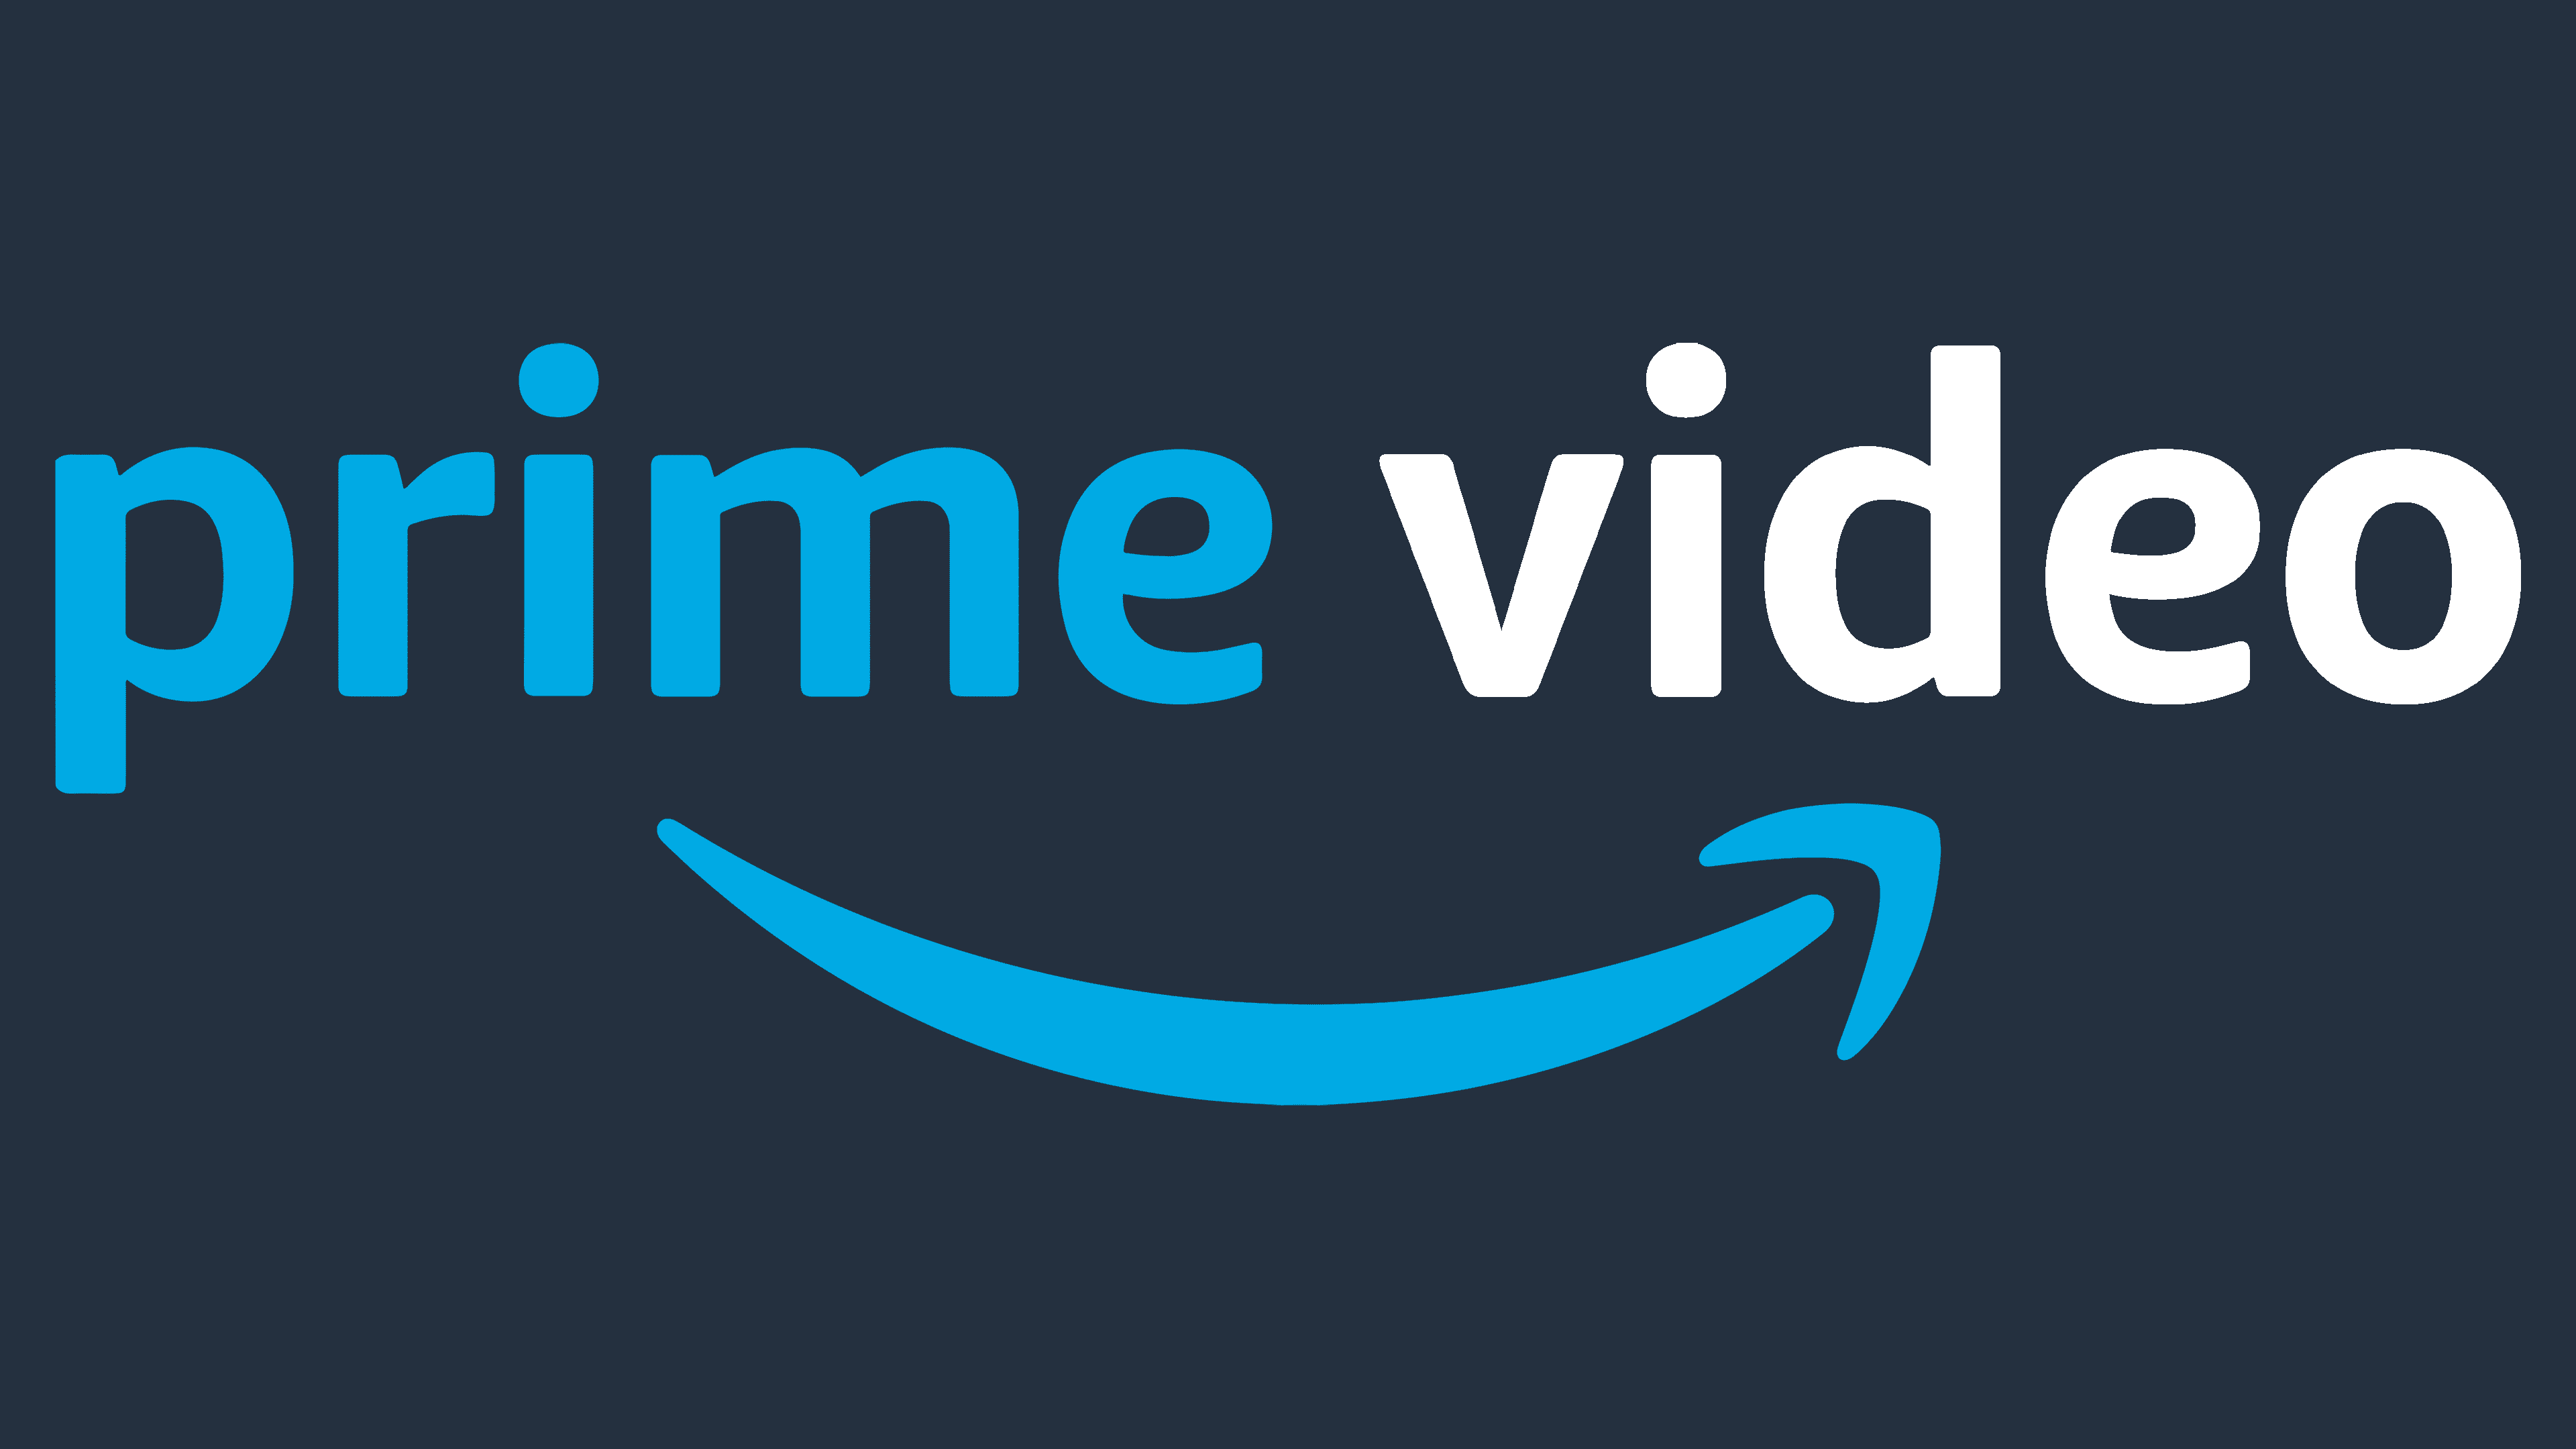
Welcome to an exciting exploration of Amazon Prime Video's vast content library!

In this project, we dive deep into the world of movies, TV shows, and genres, uncovering key trends and patterns through interactive visualizations.

In recent years, the popularity of OTT platforms like Amazon Prime Video has skyrocketed, especially with changes in viewing habits during the pandemic. This project aims to understand the distribution of content on Prime Video through exploratory data analysis (EDA), using various visualizations to uncover trends.

As we move through this analysis, we'll not only learn interesting insights about the data but also explore the impact of real-world events, such as the rise of OTT platforms during the COVID-19 pandemic.

We'll cover:

The type of content available (movies vs TV shows), The release patterns over the years, Popular genres, Content distribution based on ratings.

Ready? Let’s begin by loading and cleaning the data, followed by some exciting visualizations! 🚀

---

## **1. Importing Libraries 📚**

To work on this project, we'll be using Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly. These will help in manipulating data and creating interactive plots.

In [1]:
# Data Analysis Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing
import scipy as sp  # For scientific computing

# Data Visualization Libraries
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # Built on top of matplotlib, provides a high-level interface for statistical graphics
import plotly.express as px
import warnings
warnings.filterwarnings(action = "ignore")
from wordcloud import WordCloud

##**2. Loading and Cleaning the Data 🧹**

The dataset contains information about Prime Video content, such as the title, type (Movie or TV Show), genre, release year, country, rating, and duration. But before we jump into the analysis, we need to clean the data by handling missing values and ensuring all fields are properly formatted.

In [2]:
data = pd.read_csv('amazon_prime_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


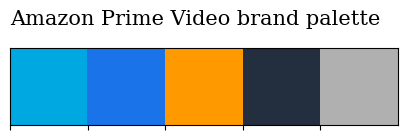

In [3]:
sns.palplot(['#00A8E1', '#1A73E8', '#FF9900', '#232F3E', '#B0B0B0'])

plt.title("Amazon Prime Video brand palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [5]:
# percent null values
((data.isnull().sum()/data.shape[0])*100).round(2)

,0
show_id,0.00
type,0.00
title,0.00
director,21.55
cast,12.75
country,93.05
date_added,98.40
release_year,0.00
rating,3.49
duration,0.00


In [6]:
# Let's fill missing values
data['director']= data['director'].fillna('Unknown')
data['cast']= data['cast'].fillna('Unknown')
data['country']= data['country'].fillna('Unknown')

# Let's fill missing values 'date_added' and 'rating' with mode
data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data['rating'].fillna(data['rating'].mode()[0], inplace=True)

In [7]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [8]:
# checking for duplicates
data.duplicated().sum()

0

In [9]:
# descriptive_statistics
data.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,9668,9668,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,9668,2,Movie,7814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,9668,9668,The Grand Seduction,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,9668,5774,Unknown,2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,9668,7928,Unknown,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,9668,87,Unknown,8996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,9668,NaN,NaN,NaN,2021-03-31 17:00:25.320645376,2021-03-30 00:00:00,2021-03-30 00:00:00,2021-03-30 00:00:00,2021-03-30 00:00:00,2021-10-10 00:00:00,NaN
release_year,9668.0,NaN,NaN,NaN,2008.341849,1920.0,2007.0,2016.0,2019.0,2021.0,18.922482
rating,9668,24,13+,2454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,9668,219,1 Season,1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **3. Exploratory Data Analysis (EDA) 🔍**

Here comes the exciting part—visualizing and understanding the patterns within the dataset!

###**Distribution of Content by Release Year 📅**


In [10]:
# Grouping content by release year
content_per_year = data.groupby('release_year').size().reset_index(name='count')

# Creating an interactive bar chart using Plotly with color intensity
fig = px.bar(content_per_year, x='release_year', y='count',
             title='Prime Video Content Added Per Year 📅',
             labels={'release_year': 'Year', 'count': 'Number of Titles'},
             color='count',  # Color based on the count of titles
             color_continuous_scale=['#00A8E1', '#007DBA', '#005A8C'],  # Prime Video shades
             range_color=(content_per_year['count'].min(), content_per_year['count'].max()))  # Adjust the intensity range

# Updating layout for better readability
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=content_per_year['release_year'].min(), dtick=1),
    font_family='serif',
    font_size=14,
    title_font_size=26,
    title_x=0.5,
    title_y=0.95,
    xaxis_title='Year',
    yaxis_title='Number of Titles',
    hovermode="x unified",
    plot_bgcolor='#1C1C1C',
    paper_bgcolor='#1C1C1C',
    font_color='white'
)

# Show the interactive plot
fig.show()

💡 What this graph tells us: Here, we can see the distribution of Prime Video content added each year. The peak years show when Prime Video was actively expanding its content library!

**Insight:** The majority of content on Prime Video was released in 2021. This sharp increase in content release is likely due to the surge in OTT consumption during the COVID-19 pandemic when cinemas were closed. Not only did Prime release new content, but it also added a lot of older movies to its platform.

We see a consistent rise in content over the years, with 2021 being a stand-out year.
The increase aligns with the pandemic when OTT platforms became the primary source of entertainment for many.

###**Prime Video Genre Distribution 🎭 (Top 10 Genres)**

In [27]:
# Aggregating the genre data
genres = data['listed_in'].str.split(',').explode().value_counts().reset_index(name='count')
genres.columns = ['genre', 'count']

# Keep only the top 10 genres, group the rest as "Others"
top_genres = genres[:10]
others = pd.DataFrame([{'genre': 'Others', 'count': genres[10:]['count'].sum()}])
genres_filtered = pd.concat([top_genres, others])

# Interactive pie chart for genre distribution (top 10 + others)
fig = px.pie(genres_filtered, values='count', names='genre',
             color_discrete_sequence=['#00A8E1', '#007DBA', '#005A8C'],  # Prime Video colors
             title="Prime Video Genre Distribution 🎭 (Top 10 Genres)")

# Adding interaction
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',
                  marker=dict(line=dict(color='#1C1C1C', width=2)))

# Layout updates for better visualization
fig.update_layout(
    title_font_family="serif",
    title_font_size=26,
    title_x=0.5,
    plot_bgcolor='#1C1C1C',
    paper_bgcolor='#1C1C1C',
    font_color='white'
)

fig.show()

In [19]:
# Horizontal bar plot for genre distribution
fig = px.bar(genres_filtered, x='count', y='genre',
             color='count',
             color_continuous_scale=['#00A8E1', '#0091C8', '#006D9B'],  # Prime Video colors
             title="Prime Video Genre Distribution 🎭 (Top 10 Genres + Others)",
             labels={'count': 'Number of Titles', 'genre': 'Genre'})

# Bar chart styling
fig.update_layout(
    title_font_family="serif",
    title_font_size=26,
    title_x=0.5,
    xaxis_title="Number of Titles",
    yaxis_title="Genre",
    plot_bgcolor='#1C1C1C',
    paper_bgcolor='#1C1C1C',
    font_color='white'
)

fig.show()


We have two different visualizations for this—let’s take a look at both:

**Pie Chart 🍕**

**Insight:** The pie chart shows that Drama is the most dominant genre, accounting for 12.1% of the total content. Action and Comedy follow closely behind with 9.05% and 8.06%, respectively. The “Others” section includes smaller genres, collectively making up 36%.

* Drama: 12.1%

* Action: 9.05%

* Comedy: 8.06%

* Others: 36%

This pie chart gives a good overview of the top genres, making it easier to visualize the distribution.

---



**Bar Chart 📊**

**Insight:** The bar chart also shows that Drama leads with over 2,000 titles, followed by Action and Comedy. While the bar chart shows exact counts, the pie chart offers a clearer distribution.

**Learning:** While both the pie and bar charts offer valuable insights, the pie chart provides a more visually digestible representation of distribution.

> This highlights the importance of choosing the right chart type for different purposes.



###**Prime Video Content Distribution by Rating 🎬**

In [21]:
# Grouping by rating
content_by_rating = data.groupby('rating').size().reset_index(name='count')

# Interactive horizontal bar plot
fig = px.bar(content_by_rating,
             x='count', y='rating', orientation='h',
             color='count',
             color_continuous_scale=['#00A8E1', '#0091C8', '#006D9B'],  # Prime colors
             title="Prime Video Content Distribution by Rating 🎬",
             labels={'rating': 'Rating', 'count': 'Number of Titles'},
             hover_data={'rating': True, 'count': True})

# Bar chart styling
fig.update_layout(
    title_font_family="serif",
    title_font_size=26,
    title_x=0.5,
    title_y=0.95,
    xaxis_title="Number of Titles",
    yaxis_title="Rating",
    plot_bgcolor='#1C1C1C',
    paper_bgcolor='#1C1C1C',
    font_color='white'
)

fig.show()


**Insight:** Most of Prime Video's content is rated `13+`, which indicates that the platform caters heavily to teenage viewers. The `16+` rating follows next, while content rated `18+` comes third.


This tells us that Prime is generally family-friendly, with a significant amount of content for teenagers, making it a popular choice for this age group.

###**Prime Video Content Distribution: Movies vs TV Shows 🍿📺**

In [22]:
# Aggregating the data to get counts of Movies and TV Shows
content_type = data['type'].value_counts().reset_index(name='count')
content_type.columns = ['type', 'count']

# Creating a donut chart for Movies and TV Shows
fig = px.pie(content_type, values='count', names='type',
             color_discrete_sequence=['#00A8E1', '#006D9B'],  # Prime Video brand colors
             hole=0.5,  # Creates the donut effect
             title="Prime Video Content Distribution: Movies vs TV Shows 🍿📺")

# Adding interaction and customization
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent',
                  marker=dict(line=dict(color='#1C1C1C', width=2)))

# Updating layout for better visualization
fig.update_layout(
    title_font_family="serif",
    title_font_size=26,
    title_x=0.5,  # Center the title
    paper_bgcolor='#1C1C1C',  # Prime Video dark background
    font_color='white',
    annotations=[dict(text='Movies vs TV Shows', x=0.5, y=0.5, font_size=16, showarrow=False)]
)

# Show the chart
fig.show()

**Insight:** The donut chart shows that `80.8% `of Prime’s content consists of movies, while only `19.2%` are TV shows. This highlights the platform’s focus on feature films, though it has a respectable collection of TV series as well.

## **4. Conclusion 🎉**

This project has been a fun exploration of Amazon Prime Video's content distribution.

Here’s what we’ve learned:

> 2021 was a breakthrough year for Prime Video in terms of content release, likely driven by the pandemic.


> Drama, Action, and Comedy are the leading genres, with drama being the most dominant.

> Prime Video caters mostly to teenagers and older audiences with a significant portion of 13+ rated content.

> The platform primarily focuses on movies, making up more than 80% of its total content.

By analyzing these trends, we can better understand Amazon Prime Video's approach to content distribution and its target audience.

I hope you enjoyed this data exploration as much as I did!

Please stay tuned for more OTT insights; you can fix this project for your analysis.